#Imports

In [0]:
import numpy as np

In [0]:
from numpy import *

In [0]:
from scipy.optimize import minimize

In [0]:
import matplotlib.pyplot as plt

In [0]:
import matplotlib.ticker as mtick


#PREGUNTA 1

Escogemos las regiones de Tarapacá y Araucanía junto con la metropolitana desde el 7 de Marzo hasta el 15 de Abril y se suman estos valores


Se obtienen los datos: 
[0, 5, 5, 10, 14, 23, 29, 40, 54, 124, 153, 178, 254, 313, 374, 436, 500, 603, 760,862, 1086, 1266, 1378, 1550, 1732, 1874, 2037, 2187, 2451, 2631, 2827, 2985, 3243, 3550, 3940, 4225, 4420, 4650, 4964, 5222]

In [32]:
#Datos Chile
datos=np.array([0, 5, 5, 10, 14, 23, 29, 40, 54, 124, 153, 178, 254, 313, 374, 436, 500, 603, 760,862, 1086, 1266, 1378, 1550, 1732, 1874, 2037, 2187, 2451, 2631, 2827, 2985, 3243, 3550, 3940, 4225, 4420, 4650, 4964, 5222])
print(datos)

[   0    5    5   10   14   23   29   40   54  124  153  178  254  313
  374  436  500  603  760  862 1086 1266 1378 1550 1732 1874 2037 2187
 2451 2631 2827 2985 3243 3550 3940 4225 4420 4650 4964 5222]


In [33]:
#Datos Madrid
datosM=np.array([4, 5, 8, 10, 29, 49, 70, 90, 137, 174, 202, 469, 782, 1024, 1388, 1990, 2940, 3544, 4165, 4871, 5637, 6777, 7165, 8921, 9702, 10575, 12352, 14597, 17166, 19243, 21520, 22677, 24090, 27509, 29840, 32155, 34188, 36249, 37584, 38723, 40469, 42450, 43877, 44783, 45849, 46587, 47146, 48048, 49526, 50694, 51993, 52946, 54884, 56963])
print(datosM)

[    4     5     8    10    29    49    70    90   137   174   202   469
   782  1024  1388  1990  2940  3544  4165  4871  5637  6777  7165  8921
  9702 10575 12352 14597 17166 19243 21520 22677 24090 27509 29840 32155
 34188 36249 37584 38723 40469 42450 43877 44783 45849 46587 47146 48048
 49526 50694 51993 52946 54884 56963]


In [0]:
largo=range(len(datos)) #40 datos Chile

In [0]:
largoM=range(len(datosM)) #55 datos Madrid

In [0]:
#MinimoscuadradosExponencial: np.array([a,b,c]) -> num
#Recibe las 3 variables del modelo exponencial y devuelve la raiz cuadrade de
#la suma de los errores (dato-funcion) al cuadrado
def minimoscuadradosExponencial(a):
  sum=0
  for i in largo:
    sum+= (datos[i]-a[0]*exp(a[1]*(i-a[2])))**2 
  return np.sqrt(sum)

In [0]:
#MinimoscuadradosLogistico: np.array([a,b,c]) -> num
#Recibe las 3 variables del modelo logistico y devuelve la raiz cuadrade de
#la suma de los errores (dato-funcion) al cuadrado
def minimoscuadradosLogistico(a):
  sum=0
  for i in largo:
    sum+= (datos[i]-(a[0]/(1+exp(-(i-a[2])/a[1]))))**2 
  return np.sqrt(sum)

In [0]:
#MinimoscuadradosGompertz: np.array([a,b,c]) -> num
#Recibe las 3 variables del modelo de Gompertz y devuelve la raiz cuadrade de
#la suma de los errores (dato-funcion) al cuadrado
def minimoscuadradosGompertz(a):
  sum=0
  for i in largo:
    sum+= (datos[i]-a[0]*exp(-a[1]*exp(-a[2]*i)))**2
  return np.sqrt(sum)

In [39]:
#CHILE
#MINIMIZAR para modelo exponencial
a0=np.array([10,1,-20])
res=minimize(minimoscuadradosExponencial,a0,options={'disp':True})
print(res.x)
print(res.fun)

         Current function value: 1529.884132
         Iterations: 32
         Function evaluations: 417
         Gradient evaluations: 81
[ 1.08308139e+02  9.23291211e-02 -4.13911403e+00]
1529.8841324871717


In [40]:
#CHILE
#MINIMIZAR para modelo logistico
a0=np.array([1573,20,-5])
res=minimize(minimoscuadradosLogistico,a0,options={'disp':True})
print(res.x)
print(res.fun)

         Current function value: 596.441283
         Iterations: 32
         Function evaluations: 466
         Gradient evaluations: 91
[7.08694253e+03 6.79726614e+00 3.25027841e+01]
596.4412826631549


In [41]:
#CHILE
#MINIMIZAR para modelo de Gompertz
a0=np.array([1000,0.1,0.1])
res=minimize(minimoscuadradosGompertz,a0,options={'disp':True})
print(res.x)
print(res.fun)

         Current function value: 356.579283
         Iterations: 69
         Function evaluations: 877
         Gradient evaluations: 173
[1.46310714e+04 7.26690960e+00 4.99915714e-02]
356.57928309763236


In [42]:
#MADRID
#MINIMIZAR para Exponencial
a0M=np.array([100,0.8,-20])
res=minimize(minimoscuadradosExponencial,a0M,options={'disp':True})
print(res.x)
print(res.fun)

         Current function value: 1487.411256
         Iterations: 16
         Function evaluations: 697
         Gradient evaluations: 137
[2.59238027e+02 8.81106548e-02 3.88858975e+00]
1487.4112559220525


In [43]:
#MADRID
#MINIMIZAR para Logistico
a0M=np.array([1573,20,-5])
res=minimize(minimoscuadradosLogistico,a0M,options={'disp':True})
print(res.x)
print(res.fun)

         Current function value: 596.441283
         Iterations: 32
         Function evaluations: 466
         Gradient evaluations: 91
[7.08694253e+03 6.79726614e+00 3.25027841e+01]
596.4412826631549


In [44]:
#MADRID
#MINIMIZAR para Gompertz
a0M=np.array([10,5,7])
res=minimize(minimoscuadradosGompertz,a0M,options={'disp':True})
print(res.x)
print(res.fun)

         Current function value: 356.579279
         Iterations: 43
         Function evaluations: 762
         Gradient evaluations: 150
[1.46303933e+04 7.26696813e+00 4.99928150e-02]
356.57927915672246


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


##Gráficos Chile

Text(0, 0.5, 'Casos confirmados')

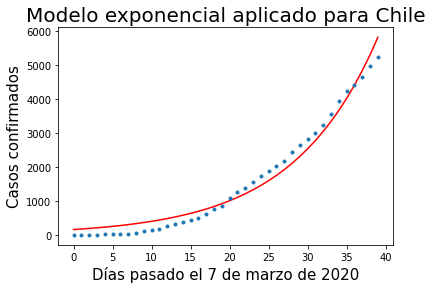

In [45]:
#CHILE
#Graficar funcion exponencial y datos reales.
y=[]
for i in largo:
  y.append(108.308139*exp(0.0923291211*(i+4.13911403)))
plt.plot(largo,y,'r')
plt.plot(largo,datos,'.')
plt.title("Modelo exponencial aplicado para Chile", fontsize=20)
plt.xlabel("Días pasado el 7 de marzo de 2020", fontsize=15)
plt.ylabel("Casos confirmados", fontsize=15)

Text(0, 0.5, 'Casos confirmados')

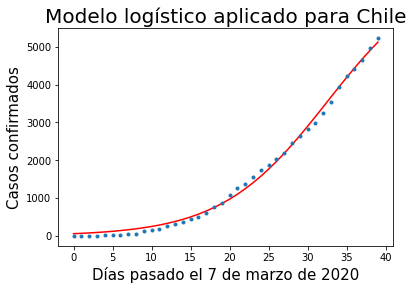

In [46]:
#CHILE
#Graficar funcion Logistico y datos reales.
y=[]
for i in largo:
  y.append(7086.94253/(1+exp(-(i-32.5027841)/6.79726614)))
plt.plot(largo,y,'r')
plt.plot(largo,datos,'.')
plt.title("Modelo logístico aplicado para Chile", fontsize=20)
plt.xlabel("Días pasado el 7 de marzo de 2020", fontsize=15)
plt.ylabel("Casos confirmados", fontsize=15)

Text(0, 0.5, 'Casos confirmados')

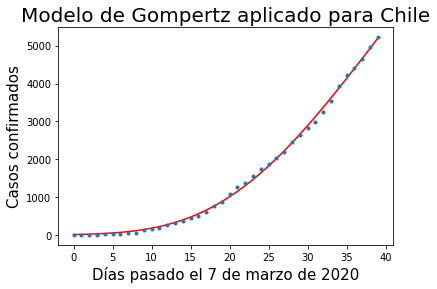

In [47]:
#CHILE
#Graficar funcion Gompertz y datos reales.
y=[]
for i in largo:
  y.append(14631.0714*exp(-7.26690960*exp(-0.0499915714*i)))
plt.plot(largo,y,'r')
plt.plot(largo,datos,'.')
plt.title("Modelo de Gompertz aplicado para Chile", fontsize=20)
plt.xlabel("Días pasado el 7 de marzo de 2020", fontsize=15)
plt.ylabel("Casos confirmados", fontsize=15)

Text(0, 0.5, 'Casos confirmados')

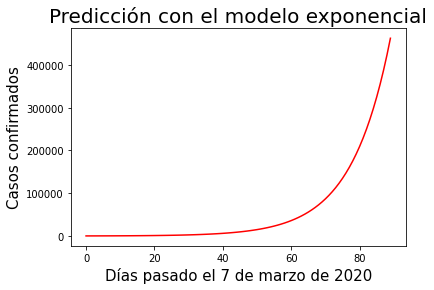

In [48]:
#CHILE
#Graficar funcion exponencial PREDICCION
y=[]
x=range(len(datos)+50) #cantidad de datos+50 dias
for i in x:
  y.append(30.39*exp(0.088*(i+20.43)))
plt.plot(x,y,'r')
plt.title("Predicción con el modelo exponencial", fontsize=20)
plt.xlabel("Días pasado el 7 de marzo de 2020", fontsize=15)
plt.ylabel("Casos confirmados", fontsize=15)

Text(0, 0.5, 'Casos confirmados')

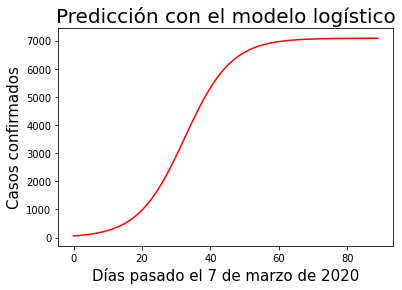

In [49]:
#CHILE
#Graficar funcion Logistico PREDICCION
y=[]
x=range(len(datos)+50) #cantidad de datos+50 dias
for i in x:
  y.append(7086.94/(1+exp(-(i-32.5)/6.797)))
plt.plot(x,y,'r')
plt.title("Predicción con el modelo logístico", fontsize=20)
plt.xlabel("Días pasado el 7 de marzo de 2020", fontsize=15)
plt.ylabel("Casos confirmados", fontsize=15)

Text(0, 0.5, 'Casos confirmados')

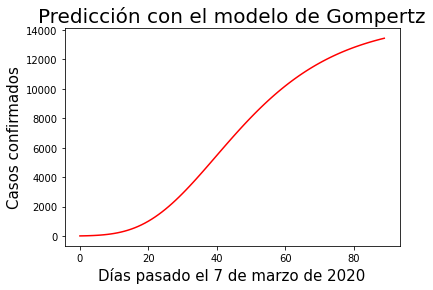

In [50]:
#CHILE
#Graficar funcion Gompertz PREDICCION
y=[]
x=range(len(datos)+50) #cantidad de datos+50 dias
for i in x:
  y.append(14631*exp(-7.266909*exp(-0.05*i)))
plt.plot(x,y,'r')
plt.title("Predicción con el modelo de Gompertz", fontsize=20)
plt.xlabel("Días pasado el 7 de marzo de 2020", fontsize=15)
plt.ylabel("Casos confirmados", fontsize=15)

##Gráficos Madrid

Text(0, 0.5, 'Casos confirmados')

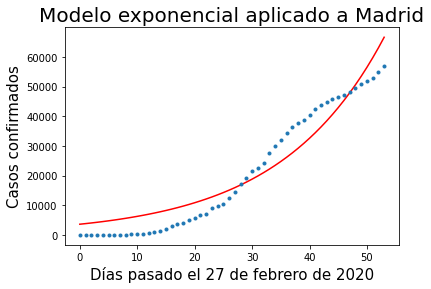

In [51]:
#MADRID
#Graficar funcion exponencial
y=[]
for i in largoM:
  y.append(1118.87920*exp( 0.0550099215*(i+21.2885326)))
plt.plot(largoM,y,'r')
plt.plot(largoM,datosM,'.')
plt.title("Modelo exponencial aplicado a Madrid", fontsize=20)
plt.xlabel("Días pasado el 27 de febrero de 2020", fontsize=15)
plt.ylabel("Casos confirmados", fontsize=15)

Text(0, 0.5, 'Casos confirmados')

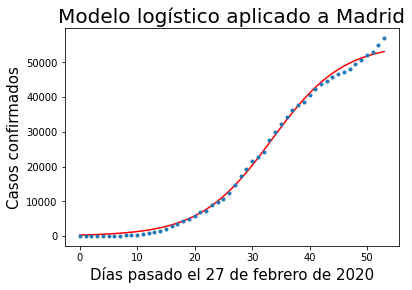

In [52]:
#MADRID
#Graficar funcion Logistico
y=[]
for i in largoM:
  y.append(55426.3955/(1+exp(-(i-33.4108463)/6.22651686)))
plt.plot(largoM,y,'r')
plt.plot(largoM,datosM,'.')
plt.title("Modelo logístico aplicado a Madrid", fontsize=20)
plt.xlabel("Días pasado el 27 de febrero de 2020", fontsize=15)
plt.ylabel("Casos confirmados", fontsize=15)

Text(0, 0.5, 'Casos confirmados')

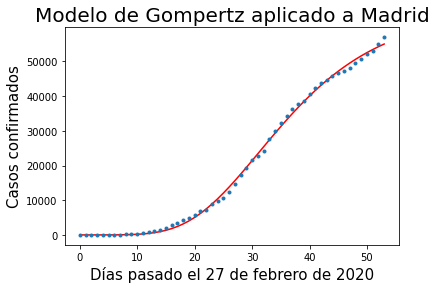

In [53]:
#MADRID
#Graficar funcion Gompertz
y=[]
for i in largoM:
  y.append(64636.6488*exp(-13.6035293*exp(-0.0836726039*i)))
plt.plot(largoM,y,'r')
plt.plot(largoM,datosM,'.')
plt.title("Modelo de Gompertz aplicado a Madrid", fontsize=20)
plt.xlabel("Días pasado el 27 de febrero de 2020", fontsize=15)
plt.ylabel("Casos confirmados", fontsize=15)

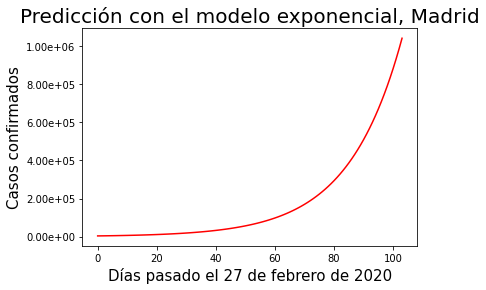

In [54]:
#MADRID
#Graficar funcion exponencial PREDICCION
fig = plt.figure()
ax = fig.add_subplot(111)
y=[]
x=range(len(datosM)+50) #cantidad de datos+50 dias
for i in x:
  y.append(1118.87920*exp(0.0550099215*(i+21.2885326)))
ax.plot(x,y,'r')
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
plt.title("Predicción con el modelo exponencial, Madrid", fontsize=20)
plt.xlabel("Días pasado el 27 de febrero de 2020", fontsize=15)
plt.ylabel("Casos confirmados", fontsize=15)
plt.show()

Text(0, 0.5, 'Casos confirmados')

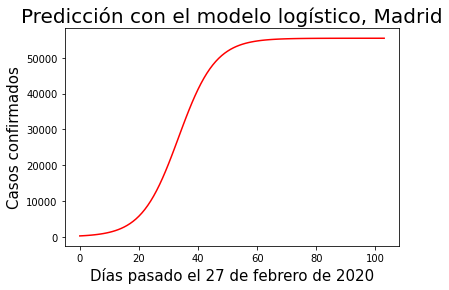

In [55]:
#MADRID
#Graficar funcion Logistico PREDICCION
y=[]
x=range(len(datosM)+50) #cantidad de datos+50 dias
for i in x:
  y.append(55426.3955/(1+exp(-(i-33.4108463)/6.22651686)))
plt.plot(x,y,'r')
plt.title("Predicción con el modelo logístico, Madrid", fontsize=20)
plt.xlabel("Días pasado el 27 de febrero de 2020", fontsize=15)
plt.ylabel("Casos confirmados", fontsize=15)

Text(0, 0.5, 'Casos confirmados')

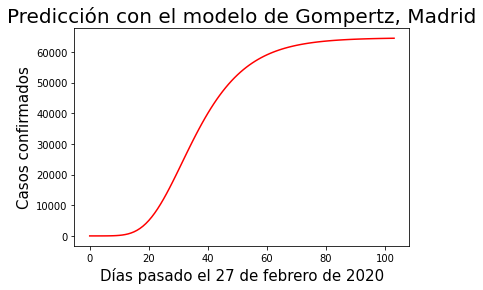

In [56]:
#MADRID
#Graficar funcion Gompertz PREDICCION
y=[]
x=range(len(datosM)+50) #cantidad de datos+50 dias
for i in x:
  y.append(64636.6488*exp(-13.6035293*exp(-0.0836726039*i)))
plt.plot(x,y,'r')
plt.title("Predicción con el modelo de Gompertz, Madrid", fontsize=20)
plt.xlabel("Días pasado el 27 de febrero de 2020", fontsize=15)
plt.ylabel("Casos confirmados", fontsize=15)

#PREGUNTA 2

Se escoge medir los datos hasta el dia 20 de Abril de 2020

In [0]:
#DATOS: enlistados y ordenados por región de norte a sur, donde para los indices:
#i=0  Arica y Parinacota
#i=1  Tarapacá
#i=2  Antofagasta
#i=3  Atacama
#i=4  Coquimbo
#i=5  Valparaíso
#i=6  Santiago
#i=7  O’Higgins
#i=8  Maule
#i=9  Ñuble
#i=10 Biobío
#i=11 Araucanía
#i=12 Los Ríos
#i=13 Los Lagos
#i=14 Aysén
#i=15 Magallanes

#Muertes por Covid-19, sacados directamente de la fuente [1]
d=[2, 0, 1, 0, 0, 5, 67, 0, 10, 13, 3, 23, 3, 6, 0, 6]

#Casos totales, sacados directamente de la fuente [1]
c=[161, 93, 263, 13, 69, 388, 5643, 56, 304, 687, 626, 1045, 162, 424, 7, 566]

#Poblacion, sacada directamente de la fuente [1]
p=[252110, 382773, 691854, 314709, 836096, 1960170, 8125072, 991063, 1131939, 511551, 1663696, 1014343, 405835, 891440, 107297, 178362]
poblacionTotal=0
for i in p:
  poblacionTotal+=i

#Positividad del test, se obtiene de [1] la cantidad total de tests realizados (118827) y se dividen por región según poblacion.
#obteniendose el valor de "tests por región", por lo que la tasa de positividad sería la razon entre casos confirmados y tests por región.
testTotales=118827
ro=[]
for i in range(len(p)):
  testRegion=testTotales*(p[i]/poblacionTotal)
  positividad=c[i]/testRegion
  ro.append(positividad)

#razon entre muertes y casos confirmados a nivel mundial, dato del problema
proporcionMuertes=0.0097

#Estimación test totales que puede realizar chile según referencias del informe.
b=1000000

#Las cotas superiores se calculan segun la cantidad de población en cada region.
s=[]
for i in range(len(p)):
  cotaSup=b*(p[i]/poblacionTotal)
  s.append(cotaSup)

#Las cotas inferiores se dejan como 0 pues puede que sea factible no hacer ningún test en una región.
l=[]
for i in range(len(p)):
  l.append(0)



In [0]:
#ResultadosPositivos: 0<=int<=15 list(int)-> num
#dado el indice de una región y una lista con los tests que se hacen por region
#da una medida de los resultados positivos de los tests que se hacen en esa region
def resultadosPositivos(i,x):
  valor=(u[i]/p[i])*x[i]-ro[i]/(2*p[i])*x[i]**2
  return valor

#funcionAMinimizar: list(int) -> num
#dada un lista de tests que se hacen por region, entrega la suma
#de los resultados positivos de todas las regiones
#con signo contrario pues se quiere maximizar esta suma, por ende
#se minimiza la suma negativa.
def funcionAMinimizar(x):
  suma=0
  for i in range(len(p)):
    suma+=resultadosPositivos(i,x)
  valor=-1*suma
  return valor

#cotas de x para cada coordenada
#cada x[i] debe estar entre l[i] y s[i]
bnds=[]
for i in range(len(p)):
  bnds.append((l[i],s[i]))

#restricciones del problema de la forma g(x)>=0
#la suma de todos los x[i] debe ser menor a b
#entonces, b-sum(x[i])>=0
def g(x):
  valor=b
  for i in range(len(p)):
    valor-=x[i]
  return valor
cons=[{'type':'ineq','fun':g}]



In [59]:
proporcionMuertes=0.0097
#Estimacion de personas enfermas aun no detectadas por region, se obtiene que hay 0 casos sin detectar.
u=[]
for i in range(len(p)):
  estimacion=(d[i]/proporcionMuertes)-c[i]
  if estimacion>0:
    u.append(estimacion)
  else:
    u.append(0)

#Minimizar la funcion
#Esta minimización se hará repetidas veces para distintos puntos iniciales
#luego nos quedaremos con el punto inicial que arroje el valor minimo.

#Para los puntos iniciales, utilizaremos puntos que vayan desde 0
#hasta un cierto valor de tests en todas las regiones pese a que
#no esté en la region factible, luego verificaremos que lo obtenido sea válido
listaPuntosIniciales=[]
for i in np.linspace(0, testTotales, 50):
  x=[]
  #misma cantidad de tests a todas las regiones (16 veces)
  x.append(i)
  x.append(i)
  x.append(i)
  x.append(i)
  x.append(i)
  x.append(i)
  x.append(i)
  x.append(i)
  x.append(i)
  x.append(i)
  x.append(i)
  x.append(i)
  x.append(i)
  x.append(i)
  x.append(i)
  x.append(i)
  listaPuntosIniciales.append(x)

#Minimizar
minimo=[]
valorMinimoFuncion=100000000000000000 #Un numero suficientemente grande
for i in listaPuntosIniciales:
  res=minimize(funcionAMinimizar,i , options={'disp':False}, bounds=bnds, constraints=cons)
  if res.fun<valorMinimoFuncion:
    minimo=res.x
    valorMinimoFuncion=res.fun
print(minimo)
print(-valorMinimoFuncion) #Se le coloca un signo menos pues max[f(x)]=-min[-f(x)]

[8.17547667e+02 3.18436139e-14 5.21656228e+02 3.65951714e+03
 3.94487657e+03 4.67501236e+03 5.86639043e+03 4.32070615e+03
 9.85717393e+03 2.13952187e+03 2.86032273e+03 9.01446733e+03
 1.32648895e+03 2.79998153e+03 1.58713721e+02 1.01382957e+02]
12.123078766483836


In [0]:
#Los valores se redondean a la unidad:

#Arica y Parinacota=818  tests
#Tarapacá          =0    tests
#Antofagasta       =522  tests
#Atacama           =3660 tests

#Coquimbo          =3945 tests
#Valparaíso        =4675 tests
#Santiago          =5866 tests
#O’Higgins         =4320 tests

#Maule             =9857 tests
#Ñuble             =2140 tests
#Biobío            =2860 tests
#Araucanía         =9014 tests

#Los Ríos          =1326 tests
#Los Lagos         =2800 tests
#Aysén             =159  tests
#Magallanes        =101  tests